In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import rpy2
from rpy2.robjects import r
NULL = r("NULL")
import sys
sys.path.append('../') # Add one directory back to the path

from PFAS_DR import PFAS_DR

%load_ext watermark
%watermark -iv

R[write to console]: The mod.exe had been created.



rpy2      : 3.4.4
sys       : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.5.3
pandas    : 1.5.2
numpy     : 1.21.2
seaborn   : 0.11.2



# Overview

Use the `PFAS_DR` class to simulate PFOS/PFOA developmental studies in **mice**.

A basic simulation uses a study-specific `dosing_dict`. As seen below, additional parameters in the model can be specified.

```
final_metrics = [] # Initialize empty list
dosing_dict = {
    'chem': <chem>,       # 'PFOS' or 'PFOA'
    'ts': 0,              # Start simulation at conception
    'tf': t_gest+t_lact,  # End of simulation. For devlopmental assume gestation plus lactation
    't_dose': 0.003,      # Oral gavage dose applied over ~5 minutes
    't_step':0.001,       # Time step for solver
    'sex': 'Male',        # Sex of dam.
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False,  # Don't sample posterior distributions
    'param_path': param_path,   # Path to the Rdata files with Wambaugh 2013 posteriors
    'model_path': model_path,   # Path to RMCSim model
    'dev': True,  
    
    't_m_start':0,             # Start maternal dosing at conception (GD0). Dosing can start before conception with t<0
    't_m_end': t_gest+t_lact,  # End maternal dosing on 20 days post-partum
    'route': 'oral',           # Oral route of exposure
    'dose': 0,                 # 0 mg/kg dose for first dose
    'M_m_1': 0.0255,           # Maternal mass at conception
    'M_m_2': 0.0318,           # Maternal mass at parturition
    'tm_daily_dose': [0],      # [0]: Once daily dosing, weekly: Once weekly dosing, None: Single dose
    
    'Qcc': 12.39,      # Qcc for rats from Wambaugh et al.

}
```

For the first dose, use the `dosing_dict` to initialize parameters, including dose, and run a simulation. Once the simulaiton is complete, store the appropriate internal dose metrics.
```
test_PFOS = PFAS_DR(**dosing_dict) # Initialize PFAS_DR class
test_PFOS.run_model() # Run the model using the dose_dict parameters
test_PFOS.plot_time_course(linestyle='-', color='blue', label_style='dose') #Optional: Plot simulation
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics)) # Append the desired dev_metrics
```

For remaining doses in a study, use `update_p` to update the appropriate simulation paramters. Any paramters not updated will remain the same as the previous simulation. Here, we update the dose to 0.3 mg/kg and change the materinal masses.

```
test_PFOS.update_p(dose=0.3, M_m_1=0.267, M_m_2=0.363) # Update parameters for next dosing scenario
test_PFOS.run_model() # Run the model with updated parameters
test_PFOS.plot_time_course(linestyle='-', color='cyan', label_style='dose') # Optional: plot new simulation
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics)) # Append the desured dev_metrics
```

After including all dosing scenarios, `final_metrics` will the internal dose metric for each external dose


In [2]:
model_path = '../pfoa_2compabandersenoral_1cmptDev'
param_path = '../data_files'

In [3]:
# Mouse specific parameters that need to be included in dosing_dict (from Kapraun et al., 2022)
t_gest = 17        # Duration (d) of pregnancy/gestation.
t_lact = 21        # Duration (d) of lactation/nursing.

M_m_1 = 0.0255       # Maternal mass 1 (kg).
M_m_2 = 0.0318      # Maternal mass 2 (kg).
t_m_1 = 1          # Time (d) since conception for maternal mass 1.
t_m_2 = 25          # Time (d) since conception for maternal mass 1.

n_f = 8           # Effective number of fetuses.
n_i = 8           # Number of infants.

M_i_1 = 0.0014     # Infant mass 1 (kg).
M_i_2 = 0.00608      # Infant mass 2 (kg).
M_i_3 = 0.00885      # Infant mass 3 (kg).
M_i_4 = 0.03      # Infant mass 4 (kg).
t_i_1 = 1          # Time (d) since birth for infant mass 1.
t_i_2 = 10          # Time (d) since birth for infant mass 2.
t_i_3 = 18         # Time (d) since birth for infant mass 3.
t_i_4 = 45         # Time (d) since birth for infant mass 4.

r_milk_0 = 0.0001   # Rate (kg/d) of milk ingestion at birth.
r_milk_1 = 0.0003   # Rate (kg/d) of milk ingestion during week 1.
r_milk_2 = 0.00054  # Rate (kg/d) of milk ingestion during week 2.
r_milk_3 = 0.00059  # Rate (kg/d) of milk ingestion during week 3.

# PFOS Mouse

In [4]:
writer = pd.ExcelWriter('internal_dose_metrics_MOUSE_DevRepro_PFOS_FINAL.xlsx', engine='xlsxwriter')

## Developmental

### Lai et al., 2017

Running developmental model
current adult dose 0.3
current infant dose 0
Running developmental model
current adult dose 3
current infant dose 0


,0.3 mg/kg,3 mg/kg
Cmax_dam,15.249561,147.011717
Cavg_dam,7.848855,76.876956
AUCavg_dam_gest,7.848858,76.876985
AUCavg_dam_lact,5.514496,51.419280
AUCavg_dam_gest_lact,6.558833,62.808419
Cavg_pup_gest,3.218014,31.519393
Cmax_pup_gest,6.252320,60.274804
Cavg_pup_lact,6.244801,58.737229
Cmax_pup_lact,7.561697,72.610331
Cavg_pup_gest_lact,4.890712,46.560828


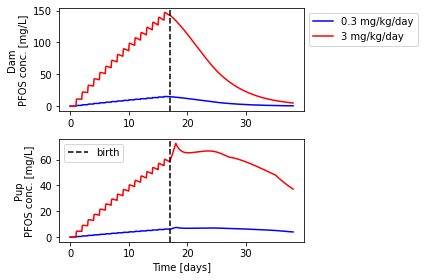

In [4]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOS',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.0001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 0.3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOS = PFAS_DR(**dosing_dict)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=3)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.add_features(disp_birth=True)
#test_PFOS.ax[1].set_ylim(1e0, 1e2)
#test_PFOS.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Lai et al, 2017')

### Lau et al., 2003

Use dose-specific pup body weights in Table 3

Running developmental model
current adult dose 1
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0
Running developmental model
current adult dose 10
current infant dose 0
Running developmental model
current adult dose 15
current infant dose 0
Running developmental model
current adult dose 20
current infant dose 0


,1 mg/kg,5 mg/kg,10 mg/kg,15 mg/kg,20 mg/kg
Cmax_dam,50.601374,234.578109,343.269532,370.486628,388.687481
Cavg_dam,26.078544,125.193406,214.266009,255.251092,276.159994
AUCavg_dam_gest,26.078552,125.193467,214.266283,255.251542,276.160533
AUCavg_dam_lact,18.166293,78.554896,101.043699,103.019169,103.698469
AUCavg_dam_gest_lact,21.706045,99.419781,151.696307,171.123576,180.853026
Cavg_pup_gest,10.692147,51.329051,87.848803,104.652746,113.225428
Cmax_pup_gest,20.746563,96.177025,140.740508,151.899517,159.361867
Cavg_pup_lact,24.261963,98.390223,138.186217,142.199352,143.847809
Cmax_pup_lact,28.362132,114.654279,166.389357,171.002223,173.514868
Cavg_pup_gest_lact,18.191256,77.336541,115.666847,125.402186,130.148323


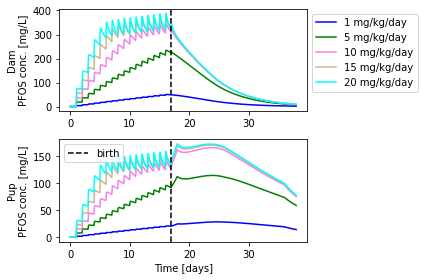

In [5]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOS',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.0001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': 0.00151,     # Infant mass 1 (kg).
    'M_i_2': 0.00457,      # Infant mass 2 (kg).
    'M_i_3': 0.00785,      # Infant mass 3 (kg).
    'M_i_4': 0.02947,      # Infant mass 4 (kg).
    't_i_1': 1,          # Time (d) since birth for infant mass 1.
    't_i_2': 9,          # Time (d) since birth for infant mass 2.
    't_i_3': 19,         # Time (d) since birth for infant mass 3.
    't_i_4': 35,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOS = PFAS_DR(**dosing_dict)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=5, M_i_1=0.00157, M_i_2=0.00505, M_i_3=0.00888,M_i_4=0.02565)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=10, M_i_1=0.00140, M_i_2=0.00445, M_i_3=0.00858,M_i_4=0.02700)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='violet', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

# Assume same BW as 10 mg/kg
test_PFOS.update_p(dose=15)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='tan', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=20)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='cyan', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.add_features(disp_birth=True)
#test_PFOS.ax[1].set_ylim(1e0, 1e2)
#test_PFOS.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Lau et al, 2003')

### Lee et al., 2015

Running developmental model
current adult dose 0.5
current infant dose 0
Running developmental model
current adult dose 2
current infant dose 0
Running developmental model
current adult dose 8
current infant dose 0


,0.5 mg/kg,2 mg/kg,8 mg/kg
Cmax_dam,9.984945,39.871056,157.947742
Cavg_dam,2.312180,9.231941,36.543354
AUCavg_dam_gest,2.312166,9.231884,36.543130
AUCavg_dam_lact,3.504109,13.899229,52.960475
AUCavg_dam_gest_lact,2.970879,11.811237,45.615994
Cavg_pup_gest,0.947977,3.785027,14.982507
Cmax_pup_gest,4.093827,16.347133,64.758574
Cavg_pup_lact,3.969131,15.766518,60.556697
Cmax_pup_lact,4.808351,19.165089,75.021704
Cavg_pup_gest_lact,2.617562,10.406378,40.168244


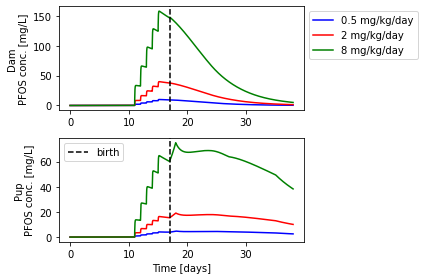

In [6]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOS',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.0001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':11,         # Start maternal dosing on GD11
    't_m_end': 16,      # End maternal dosing on GD16
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 0.5,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOS = PFAS_DR(**dosing_dict)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=2)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=8)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.add_features(disp_birth=True)
#test_PFOS.ax[1].set_ylim(1e0, 1e2)
#test_PFOS.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Lee et al, 2015')

### Mshaty et al, 2020

Dams exposed to PFOS on PND 1-14. Pup gets exposure during lactation and we don't follow exposure during gestation

*Only reporting lactaion-specfic internal dose metrics*

Running developmental model
current adult dose 0.1
current infant dose 0
Running developmental model
current adult dose 0.25
current infant dose 0
Running developmental model
current adult dose 1
current infant dose 0


,0.1 mg/kg,0.25 mg/kg,1 mg/kg
AUCavg_dam_lact,1.243659,3.107839,12.404139
Cavg_pup_lact,0.859061,2.146951,8.573235
Cmax_pup_lact,1.456539,3.639873,14.528759
AUCavg_pup_lact,0.859058,2.146944,8.573206


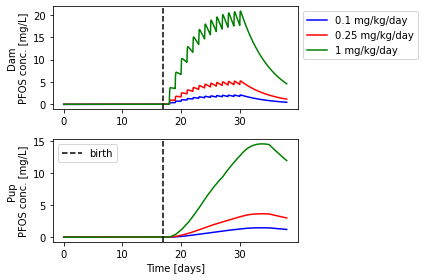

In [7]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'AUCavg_dam_lact', 'Cavg_pup_lact', 'Cmax_pup_lact', 'AUCavg_pup_lact',
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOS',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.0001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # We only have CD1 parameters for mouse
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':t_gest+1,         # Start maternal dosing on LD1
    't_m_end': t_gest+14,      # End maternal dosing on LD14
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 0.1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOS = PFAS_DR(**dosing_dict)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=0.25)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=1)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.add_features(disp_birth=True)
#test_PFOS.ax[1].set_ylim(1e0, 1e2)
#test_PFOS.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Mshaty et al, 2020')

### Zhong et al., 2016

Running developmental model
current adult dose 0.1
current infant dose 0
Running developmental model
current adult dose 1
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,0.1 mg/kg,1 mg/kg,5 mg/kg
Cmax_dam,5.093143,50.452001,233.288054
Cavg_dam,2.619339,26.047704,124.912494
AUCavg_dam_gest,2.619339,26.047705,124.912500
AUCavg_dam_lact,1.845052,18.119711,78.215996
AUCavg_dam_gest_lact,2.191444,21.666451,99.106564
Cavg_pup_gest,1.073928,10.679553,51.214098
Cmax_pup_gest,2.088188,20.685321,95.648102
Cavg_pup_lact,2.088400,20.556695,90.301910
Cmax_pup_lact,2.525972,24.998674,114.484934
Cavg_pup_gest_lact,1.634557,16.137974,72.815258


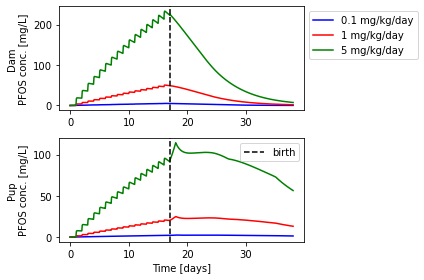

In [8]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOS',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.00001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 0.1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOS = PFAS_DR(**dosing_dict)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=1)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=5)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.add_features(disp_birth=True)
#test_PFOS.ax[1].set_ylim(1e0, 1e2)
#test_PFOS.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Zhong et al, 2016')

## Reproductive

### Qui et al., 2013

28 day study in male mice. Use a basic adult simulation.

Running adult model for CD1 with 0.25 mg/kg PFOS
Running adult model for CD1 with 2.5 mg/kg PFOS
Running adult model for CD1 with 25 mg/kg PFOS
Running adult model for CD1 with 50 mg/kg PFOS


,0.25 mg/kg,2.5 mg/kg,25 mg/kg,50 mg/kg
C7avg,18.211721,181.482071,1732.081362,3146.007254
AUC,305.413991,3047.411792,29618.685354,56082.799160
Cavg,10.932426,109.082386,1060.061347,2006.629024
Cmax,20.208138,201.250763,1902.499974,3373.836831
AUCavg,10.907643,108.836135,1057.810191,2002.957113


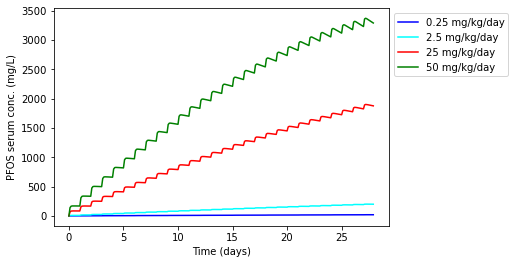

In [9]:
dev_metrics = [
    'C7avg', 'AUC', 'Cavg', 'Cmax', 'AUCavg']

final_metrics = []
dosing_dict = {'chem': 'PFOS',
                   'tf': 28,
                   'sex': 'Male',
                   'route': 'oral',
                   'strain': 'CD1',
                   'M_m_1': np.mean([0.0035, 0.0040]),
                   'Qcc': 8.68,
                   't_dose': 0.003,
                   'dose': 0.25,     # Oral gavage dose applied over ~5 minutes
                   'tm_daily_dose': [0], # Once daily
                   't_m_start': 0,
                   't_m_end': 28,
                   #'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   }

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOS = PFAS_DR(**dosing_dict)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=2.5)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='cyan', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=25)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

test_PFOS.update_p(dose=50)
test_PFOS.run_model()
test_PFOS.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOS.get_internal_dose_metrics(dev_metrics))

#test_PFOS.ax[1].set_ylim(1e0, 1e2)
#test_PFOS.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Qui et al, 2013')

In [11]:
writer.save()

# PFOA Mouse

In [12]:
writer = pd.ExcelWriter('internal_dose_metrics_MOUSE_DevRepro_PFOA_FINAL.xlsx', engine='xlsxwriter')

## Developmental

### Goulding et al., 2017

Running developmental model
current adult dose 0.1
current infant dose 0
Running developmental model
current adult dose 0.3
current infant dose 0
Running developmental model
current adult dose 1
current infant dose 0


,0.1 mg/kg,0.3 mg/kg,1 mg/kg
Cmax_dam,6.926968,20.406022,62.042853
Cavg_dam,3.613482,10.720795,33.873104
AUCavg_dam_gest,3.613494,10.720834,33.873298
AUCavg_dam_lact,1.875701,5.450678,15.535871
AUCavg_dam_gest_lact,2.653204,7.808585,23.740081
Cavg_pup_gest,0.903325,2.680066,8.467901
Cmax_pup_gest,1.731742,5.101506,15.510713
Cavg_pup_lact,2.523658,7.344871,21.086564
Cmax_pup_lact,3.325531,9.688819,27.923461
Cavg_pup_gest_lact,1.798772,5.257984,15.441373


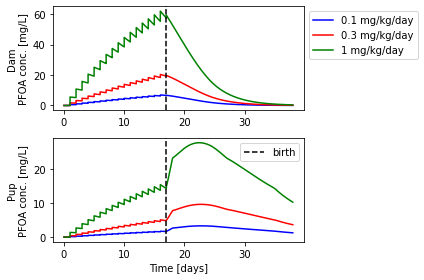

In [10]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 0.1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=0.3)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=1)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Goulding et al, 2017')

### Hu et al., 2012

Dams begin dosing ~13 days before conception. Assume all exposure to pup comes from the dam via gestation/lactation.

Considerations:
1. For PND1 endpoints, use only the gestation internal dose metrics.
2. There is no difference between M/F pups during weaning

Running developmental model
current adult dose 0.02
current infant dose 0
Running developmental model
current adult dose 0.2
current infant dose 0
Running developmental model
current adult dose 2
current infant dose 0


,0.02 mg/kg,0.2 mg/kg,2 mg/kg
Cmax_dam,1.944743,18.631162,99.693693
Cavg_dam,1.554458,15.039654,85.669807
AUCavg_dam_gest,2.058307,20.038448,128.210401
AUCavg_dam_lact,0.635982,6.029355,29.051110
AUCavg_dam_gest_lact,1.272318,12.296904,73.413778
Cavg_pup_gest,0.388610,3.759869,21.417353
Cmax_pup_gest,0.486186,4.657790,24.923423
Cavg_pup_lact,0.836668,7.939152,38.518909
Cmax_pup_lact,1.109590,10.542979,51.652172
Cavg_pup_gest_lact,0.636221,6.069473,30.868213


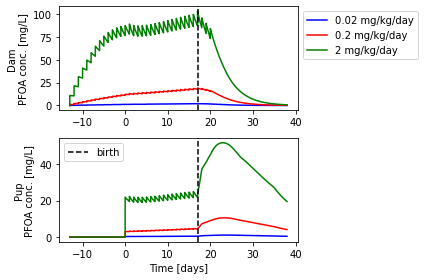

In [11]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': -13,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':-13,         # Start maternal dosing 13 days before concenption
    't_m_end': t_lact,      # End maternal dosing on PND21
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 0.02,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=0.2)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=2)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Hu et al, 2012')

### Lau et al., 2006 (1)

Mice dosed from GD1 to GD17, assume birth occurs on GD17

Running developmental model
current adult dose 1
current infant dose 0
Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0
Running developmental model
current adult dose 10
current infant dose 0
Running developmental model
current adult dose 20
current infant dose 0
Running developmental model
current adult dose 40
current infant dose 0


,1 mg/kg,3 mg/kg,5 mg/kg,10 mg/kg,20 mg/kg,40 mg/kg
Cmax_dam,62.042853,114.925591,135.886728,177.409611,252.939342,398.522857
Cavg_dam,33.873104,74.851209,91.598348,112.570188,139.739282,185.015589
AUCavg_dam_gest,33.873298,74.852345,91.599995,112.572270,139.741603,185.017977
AUCavg_dam_lact,15.535871,23.785626,25.081474,26.435312,27.883209,29.803097
AUCavg_dam_gest_lact,23.740081,46.632490,54.841203,64.971977,77.927173,99.243944
Cavg_pup_gest,8.467901,18.712383,22.899240,28.142248,34.934517,46.253521
Cmax_pup_gest,15.510713,28.731398,33.971682,44.352403,63.234835,99.630714
Cavg_pup_lact,21.086564,32.944833,35.090081,37.648980,40.908915,46.058131
Cmax_pup_lact,27.923461,43.879556,46.836443,50.493169,58.361340,73.595762
Cavg_pup_gest_lact,15.441373,26.577684,29.636284,33.395969,38.236158,46.145542


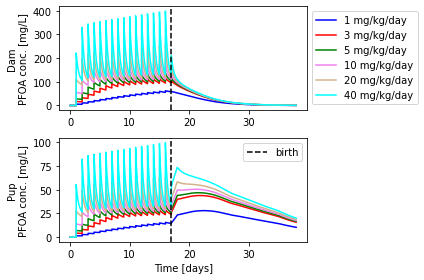

In [12]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=3)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=10)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='violet', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=20)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='tan', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=40)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='cyan', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Lau et al, 2006 (1)')

### Lau et al., 2006 (2)

Mice dosed from GD1 to GD18, assume birth occurs on GD18

Running developmental model
current adult dose 1
current infant dose 0
Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0
Running developmental model
current adult dose 10
current infant dose 0
Running developmental model
current adult dose 20
current infant dose 0
Running developmental model
current adult dose 40
current infant dose 0


,1 mg/kg,3 mg/kg,5 mg/kg,10 mg/kg,20 mg/kg,40 mg/kg
Cmax_dam,64.048069,115.224747,136.095577,177.602843,253.162664,398.833290
Cavg_dam,35.372230,76.273888,92.671525,113.396309,140.519791,185.959702
AUCavg_dam_gest,35.372439,76.275030,92.673132,113.398314,140.522017,185.961996
AUCavg_dam_lact,15.982856,23.824116,25.102228,26.448722,27.894109,29.814016
AUCavg_dam_gest_lact,24.932533,48.033462,56.290243,66.581010,79.878268,101.884927
Cavg_pup_gest,8.842698,19.068091,23.167565,28.348804,35.129669,46.489580
Cmax_pup_gest,16.012017,28.806187,34.023894,44.400711,63.290666,99.708322
Cavg_pup_lact,21.702005,33.001843,35.121963,37.671055,40.928430,46.079402
Cmax_pup_lact,28.744721,43.957220,46.880431,50.524825,58.407072,73.651798
Cavg_pup_gest_lact,15.766940,26.570881,29.604549,33.368478,38.252079,46.268715


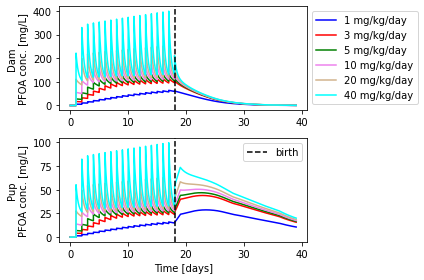

In [13]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': 18+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': 18,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 18,      # End maternal dosing on GD18
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=3)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=10)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='violet', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=20)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='tan', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=40)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='cyan', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Lau et al, 2006 (2)')

### Li et al., 2018

Running developmental model
current adult dose 1
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0
Running developmental model
current adult dose 10
current infant dose 0
Running developmental model
current adult dose 20
current infant dose 0
Running developmental model
current adult dose 40
current infant dose 0


,1 mg/kg,5 mg/kg,10 mg/kg,20 mg/kg,40 mg/kg
Cmax_dam,62.042853,135.886728,177.409611,252.939342,398.522857
Cavg_dam,33.873104,91.598348,112.570188,139.739282,185.015589
AUCavg_dam_gest,33.873298,91.599995,112.572270,139.741603,185.017977
AUCavg_dam_lact,15.535871,25.081474,26.435312,27.883209,29.803097
AUCavg_dam_gest_lact,23.740081,54.841203,64.971977,77.927173,99.243944
Cavg_pup_gest,8.467901,22.899240,28.142248,34.934517,46.253521
Cmax_pup_gest,15.510713,33.971682,44.352403,63.234835,99.630714
Cavg_pup_lact,21.086564,35.090081,37.648980,40.908915,46.058131
Cmax_pup_lact,27.923461,46.836443,50.493169,58.361340,73.595762
Cavg_pup_gest_lact,15.441373,29.636284,33.395969,38.236158,46.145542


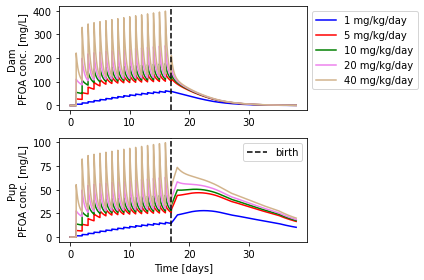

In [14]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=10)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=20)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='violet', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=40)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='tan', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Li et al, 2018')

### Macon et al., 2011 (1)

Dose dam GD10-17

Running developmental model
current adult dose 0.01
current infant dose 0
Running developmental model
current adult dose 0.1
current infant dose 0
Running developmental model
current adult dose 1
current infant dose 0


,0.01 mg/kg,0.1 mg/kg,1 mg/kg
Cmax_dam,0.393704,3.930581,38.499942
Cavg_dam,0.093391,0.932769,9.187579
AUCavg_dam_gest,0.093385,0.932710,9.187003
AUCavg_dam_lact,0.106997,1.064923,10.029212
AUCavg_dam_gest_lact,0.100910,1.005802,9.652688
Cavg_pup_gest,0.023343,0.233150,2.296484
Cmax_pup_gest,0.098426,0.982645,9.624986
Cavg_pup_lact,0.143894,1.432657,13.552097
Cmax_pup_lact,0.189538,1.887586,17.906389
Cavg_pup_gest_lact,0.089963,0.896035,8.516691


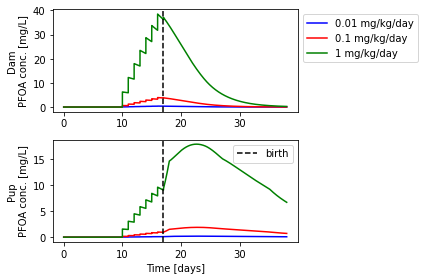

In [15]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':10,         # Start maternal dosing on GD10
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 0.01,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=0.1)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=1)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Macon et al, 2011 (1)')

### Macon et al., 2011 (2)

Dose dam GD1-17. There is no difference between male and female pups

Running developmental model
current adult dose 0.3
current infant dose 0
Running developmental model
current adult dose 1
current infant dose 0
Running developmental model
current adult dose 3
current infant dose 0


,0.3 mg/kg,1 mg/kg,3 mg/kg
Cmax_dam,20.406022,62.042853,114.925591
Cavg_dam,10.720795,33.873104,74.851209
AUCavg_dam_gest,10.720834,33.873298,74.852345
AUCavg_dam_lact,5.450678,15.535871,23.785626
AUCavg_dam_gest_lact,7.808585,23.740081,46.632490
Cavg_pup_gest,2.680066,8.467901,18.712383
Cmax_pup_gest,5.101506,15.510713,28.731398
Cavg_pup_lact,7.344871,21.086564,32.944833
Cmax_pup_lact,9.688819,27.923461,43.879556
Cavg_pup_gest_lact,5.257984,15.441373,26.577684


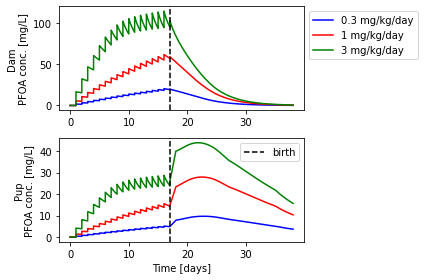

In [16]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 0.3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=1)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=3)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Macon et al, 2011 (2)')

### Song et al., 2018

Dose dam from GD1-GD17

Running developmental model
current adult dose 1
current infant dose 0
Running developmental model
current adult dose 2.5
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,1 mg/kg,2.5 mg/kg,5 mg/kg
Cmax_dam,62.042853,107.894382,135.886728
Cavg_dam,33.873104,68.089478,91.598348
AUCavg_dam_gest,33.873298,68.090395,91.599995
AUCavg_dam_lact,15.535871,23.135465,25.081474
AUCavg_dam_gest_lact,23.740081,43.248019,54.841203
Cavg_pup_gest,8.467901,17.021921,22.899240
Cmax_pup_gest,15.510713,26.973596,33.971682
Cavg_pup_lact,21.086564,31.933712,35.090081
Cmax_pup_lact,27.923461,42.501106,46.836443
Cavg_pup_gest_lact,15.441373,25.262647,29.636284


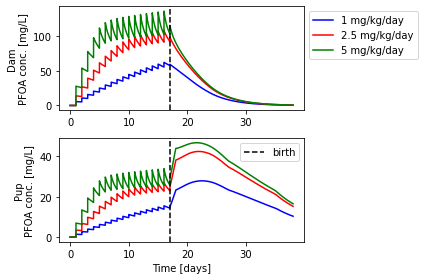

In [17]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=2.5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Song et al, 2018')

### Wolf et al., 2007 (1)

Expose dam from GD1-17. Pup only exposed through *gestation only*

Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,3 mg/kg,5 mg/kg
Cmax_dam,114.925591,135.886728
Cavg_dam,74.851209,91.598348
AUCavg_dam_gest,74.852345,91.599995
AUCavg_dam_lact,51.994683,53.734192
AUCavg_dam_gest_lact,62.222117,70.676016
Cavg_pup_gest,18.712383,22.899240
Cmax_pup_gest,28.731398,33.971682
Cavg_pup_lact,6.774596,7.550509
Cmax_pup_lact,26.017571,28.997433
Cavg_pup_gest_lact,12.115185,14.417046


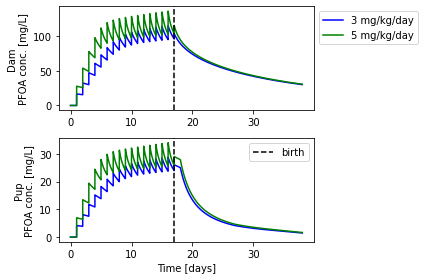

In [18]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    # Turn off exposure through lactation
    'r_milk_0': 0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': 0,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': 0,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': 0,  # Rate (kg/d) of milk ingestion during week 3.
    
    'route': 'oral',       # Oral route of exposure
    'dose': 3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Wolf et al, 2007 (1)')

### Wolf et al., 2007 (2)

Expose dam from GD1-17. Pup only exposed through *lactation only*

Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,3 mg/kg,5 mg/kg
Cmax_dam,116.676774,138.179809
Cavg_dam,75.867909,92.134469
AUCavg_dam_gest,75.869061,92.136109
AUCavg_dam_lact,23.879124,25.115525
AUCavg_dam_gest_lact,47.139020,55.099868
Cavg_pup_gest,0.000000,0.000000
Cmax_pup_gest,0.000000,0.000000
Cavg_pup_lact,26.269717,27.575177
Cmax_pup_lact,36.344882,38.129636
Cavg_pup_gest_lact,14.517475,15.238913


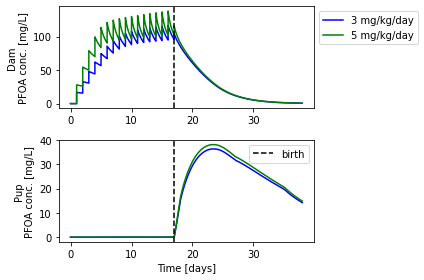

In [19]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)
test_PFOA.update_p(r_f_m= 0) # No mass transfer at birth for pups)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Wolf et al, 2007 (2)')

### Wolf et al., 2007 (3)

Expose dam from GD1-17. Pup only exposed through *gestation and lactation*

Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,3 mg/kg,5 mg/kg
Cmax_dam,114.925591,135.886728
Cavg_dam,74.851209,91.598348
AUCavg_dam_gest,74.852345,91.599995
AUCavg_dam_lact,23.785626,25.081474
AUCavg_dam_gest_lact,46.632490,54.841203
Cavg_pup_gest,18.712383,22.899240
Cmax_pup_gest,28.731398,33.971682
Cavg_pup_lact,32.944833,35.090081
Cmax_pup_lact,43.879556,46.836443
Cavg_pup_gest_lact,26.577684,29.636284


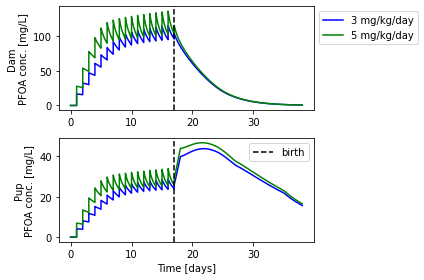

In [20]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Wolf et al, 2007 (3)')

### Wolf et al., 2007 (4)

Expose dam from GD7-17. Pup only exposed through *gestation and lactation*

Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,3 mg/kg,5 mg/kg
Cmax_dam,113.234952,135.837230
Cavg_dam,42.309223,55.067978
AUCavg_dam_gest,42.308487,55.067478
AUCavg_dam_lact,23.626550,25.073507
AUCavg_dam_gest_lact,31.985101,38.492875
Cavg_pup_gest,10.576424,13.766110
Cmax_pup_gest,28.308738,33.959308
Cavg_pup_lact,32.699567,35.079143
Cmax_pup_lact,43.548296,46.823264
Cavg_pup_gest_lact,22.802371,25.544365


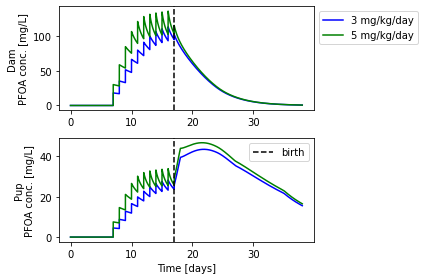

In [21]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':7,         # Start maternal dosing on GD7
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Wolf et al, 2007 (4)')

### Wolf et al., 2007 (5)

Expose dam from GD10-17. Pup only exposed through *gestation and lactation*

Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,3 mg/kg,5 mg/kg
Cmax_dam,103.632291,135.054120
Cavg_dam,25.562526,35.930229
AUCavg_dam_gest,25.561056,35.928619
AUCavg_dam_lact,22.628867,25.017067
AUCavg_dam_gest_lact,23.941266,29.899338
Cavg_pup_gest,6.389605,8.981398
Cmax_pup_gest,25.908073,33.763530
Cavg_pup_lact,31.177112,34.991122
Cmax_pup_lact,41.482490,46.707844
Cavg_pup_gest_lact,20.087964,23.355192


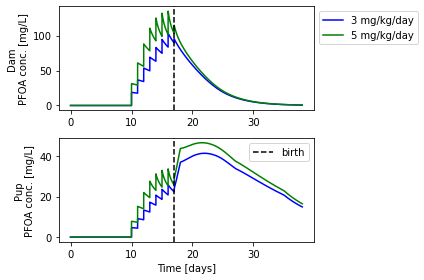

In [22]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':10,         # Start maternal dosing on GD10
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Wolf et al, 2007 (5)')

### Wolf et al., 2007 (6)

Expose dam from GD13-17. Pup only exposed through *gestation and lactation*

Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,3 mg/kg,5 mg/kg
Cmax_dam,71.805204,114.724663
Cavg_dam,10.468309,16.580835
AUCavg_dam_gest,10.466846,16.578550
AUCavg_dam_lact,17.495812,23.679420
AUCavg_dam_gest_lact,14.351652,20.503254
Cavg_pup_gest,2.616227,4.143936
Cmax_pup_gest,17.951301,28.681166
Cavg_pup_lact,23.818328,32.808319
Cmax_pup_lact,31.581485,43.715720
Cavg_pup_gest_lact,14.333178,19.984779


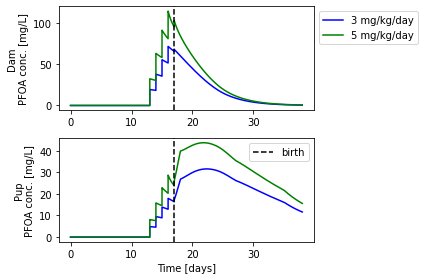

In [23]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':13,         # Start maternal dosing on GD13
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Wolf et al, 2007 (6)')

### Wolf et al., 2007 (7)

Expose dam from GD15-17. Pup only exposed through *gestation and lactation*

Running developmental model
current adult dose 3
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,3 mg/kg,5 mg/kg
Cmax_dam,38.986208,64.808892
Cavg_dam,3.358157,5.549006
AUCavg_dam_gest,3.357224,5.547456
AUCavg_dam_lact,10.095163,16.013362
AUCavg_dam_gest_lact,7.081008,11.331544
Cavg_pup_gest,0.839037,1.386425
Cmax_pup_gest,9.746552,16.202223
Cavg_pup_lact,13.649158,21.765016
Cmax_pup_lact,18.039268,28.841054
Cavg_pup_gest_lact,7.918314,12.648278


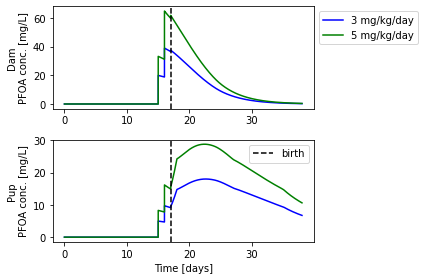

In [24]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':15,         # Start maternal dosing on GD13
    't_m_end': 17,      # End maternal dosing on GD17
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 3,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Wolf et al, 2007 (7)')

## Reproductive

### Chen et al., 2017 (1)

Dose dam from GD1-7

*Only need dose metrics specific to dam*

Running developmental model
current adult dose 2.5
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0
Running developmental model
current adult dose 10
current infant dose 0


,2.5 mg/kg,5 mg/kg,10 mg/kg
Cmax_dam,70.886472,119.233442,160.411061
Cavg_dam,41.299456,60.714355,73.210089
AUCavg_dam_gest,41.300895,60.716688,73.213108
AUCavg_dam_lact,8.987152,11.105451,11.517621
AUCavg_dam_gest_lact,23.443917,33.300828,39.119263
Cavg_pup_gest,10.324987,15.178877,18.302970
Cmax_pup_gest,17.721618,29.808361,40.102765
Cavg_pup_lact,12.129304,15.008661,15.570191
Cmax_pup_lact,16.016762,19.834084,20.579320
Cavg_pup_gest_lact,11.322109,15.084810,16.792750


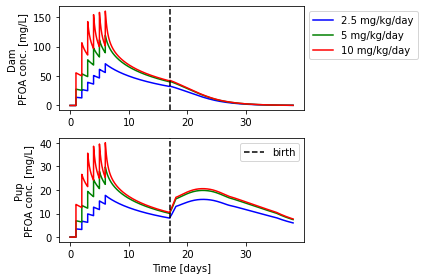

In [25]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 7,      # End maternal dosing on GD7
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 2.5,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=10)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Chen et al, 2017 (1)')

### Chen et al., 2017 (2)

Dose dam from GD1-13

*Only need dose metrics specific to dam*

Running developmental model
current adult dose 2.5
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0
Running developmental model
current adult dose 10
current infant dose 0


,2.5 mg/kg,5 mg/kg,10 mg/kg
Cmax_dam,101.620925,130.922190,170.979462
Cavg_dam,62.104289,83.296613,101.039562
AUCavg_dam_gest,62.106048,83.299456,101.043367
AUCavg_dam_lact,16.295857,17.464706,18.036166
AUCavg_dam_gest_lact,36.790858,46.918329,55.172418
Cavg_pup_gest,15.526067,20.824383,25.260343
Cmax_pup_gest,25.405231,32.730548,42.744865
Cavg_pup_lact,22.128961,23.750886,24.547212
Cmax_pup_lact,29.309041,31.474920,32.539215
Cavg_pup_gest_lact,19.175034,22.441661,24.866244


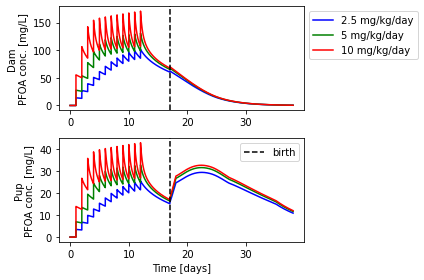

In [26]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 13,      # End maternal dosing on GD13
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 2.5,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=10)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Chen et al, 2017 (2)')

### Jiang et al., 2020

Dose dam from GD1-13

*Only need dose metrics specific to dam*

Running developmental model
current adult dose 2.5
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0
Running developmental model
current adult dose 10
current infant dose 0


,2.5 mg/kg,5 mg/kg,10 mg/kg
Cmax_dam,101.620925,130.922190,170.979462
Cavg_dam,62.104289,83.296613,101.039562
AUCavg_dam_gest,62.106048,83.299456,101.043367
AUCavg_dam_lact,16.295857,17.464706,18.036166
AUCavg_dam_gest_lact,36.790858,46.918329,55.172418
Cavg_pup_gest,15.526067,20.824383,25.260343
Cmax_pup_gest,25.405231,32.730548,42.744865
Cavg_pup_lact,22.128961,23.750886,24.547212
Cmax_pup_lact,29.309041,31.474920,32.539215
Cavg_pup_gest_lact,19.175034,22.441661,24.866244


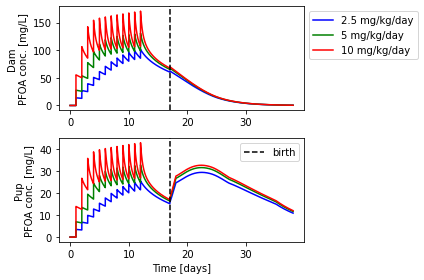

In [27]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1,         # Start maternal dosing on GD1
    't_m_end': 13,      # End maternal dosing on GD13
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 2.5,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=10)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='red', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Jiang et al, 2020')

## 1-Generation Reproductive

### Blake et al., 2020

Dose dams from GD1.5 to 11.5

Running developmental model
current adult dose 1
current infant dose 0
Running developmental model
current adult dose 5
current infant dose 0


,1 mg/kg,5 mg/kg
Cmax_dam,45.135956,128.918427
Cavg_dam,26.712790,75.569120
AUCavg_dam_gest,26.713432,75.571771
AUCavg_dam_lact,8.455954,15.552983
AUCavg_dam_gest_lact,16.624211,42.404609
Cavg_pup_gest,6.678135,18.892520
Cmax_pup_gest,11.283989,32.229607
Cavg_pup_lact,11.409216,21.100999
Cmax_pup_lact,15.063329,27.936882
Cavg_pup_gest_lact,9.292680,20.112995


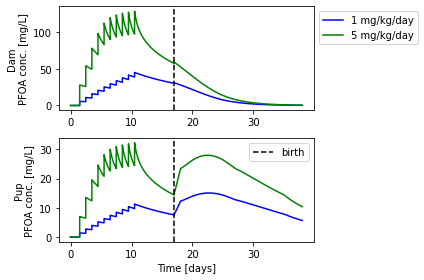

In [28]:
# Dictionary for dosing-specific parameters
dev_metrics = [
    'Cmax_dam', 'Cavg_dam', 'AUCavg_dam_gest', 'AUCavg_dam_lact', 'AUCavg_dam_gest_lact',
    'Cavg_pup_gest', 'Cmax_pup_gest', 'Cavg_pup_lact', 'Cmax_pup_lact', 'Cavg_pup_gest_lact', 
    'AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact'
]
final_metrics = []
dosing_dict = {
    'chem': 'PFOA',
    'ts': 0,         # Start simulation at conception
    'tf': t_gest+t_lact, 
    't_dose': 0.003,     # Oral gavage dose applied over ~5 minutes
    't_step':0.001,
    'sex': 'Female',           # Dams are Female
    't_gest': t_gest,
    't_lact': t_lact,
    
    'strain': 'CD1',            # Mouse simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True, 
    
    't_m_start':1.5,         # Start maternal dosing on GD1.5
    't_m_end': 11.5,      # End maternal dosing on GD11.5
    'M_m_1': M_m_1,
    'M_m_2': M_m_2,      # Maternal mass 2 (kg).
    't_m_1': t_m_1,          # Time (d) since conception for maternal mass 1.
    't_m_2': t_m_2,          # Time (d) since conception for maternal mass 1.
    
    'n_f': n_f,           # Effective number of fetuses.
    'n_i': n_f,           # Number of infants.
    
    'M_i_1': M_i_1,     # Infant mass 1 (kg).
    'M_i_2': M_i_2,      # Infant mass 2 (kg).
    'M_i_3': M_i_3,      # Infant mass 3 (kg).
    'M_i_4': M_i_4,      # Infant mass 4 (kg).
    't_i_1': t_i_1,          # Time (d) since birth for infant mass 1.
    't_i_2': t_i_2,          # Time (d) since birth for infant mass 2.
    't_i_3': t_i_3,         # Time (d) since birth for infant mass 3.
    't_i_4': t_i_4,         # Time (d) since birth for infant mass 4.
    
    'r_milk_0': r_milk_0,   # Rate (kg/d) of milk ingestion at birth.
    'r_milk_1': r_milk_1,   # Rate (kg/d) of milk ingestion during week 1.
    'r_milk_2': r_milk_2,  # Rate (kg/d) of milk ingestion during week 2.
    'r_milk_3': r_milk_3,  # Rate (kg/d) of milk ingestion during week 3.
    
    
    
    'route': 'oral',       # Oral route of exposure
    'dose': 1,             # 0 mg/kg dose
    
    'tm_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 8.68,      # Qcc for CD1 mice from Wambaugh et al.
    
}

#'M_m_1': 0.268 # Initial maternal weight
#'M_m_2': 0.365 # Post-partum maternal weight
    
test_PFOA = PFAS_DR(**dosing_dict)

test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='blue', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))

test_PFOA.update_p(dose=5)
test_PFOA.run_model()
test_PFOA.plot_time_course(linestyle='-', color='green', label_style='dose')
final_metrics.append(test_PFOA.get_internal_dose_metrics(dev_metrics))


test_PFOA.add_features(disp_birth=True)
#test_PFOA.ax[1].set_ylim(1e0, 1e2)
#test_PFOA.ax[1].set_yscale('log')
final_metrics = pd.concat(final_metrics, axis=1)
display(final_metrics)
final_metrics.to_excel(writer, sheet_name='Blake et al, 2020')

In [32]:
writer.save()